<a href="https://colab.research.google.com/github/ReidelVichot/DE_CAI_broadband/blob/main/MergingDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this notebook is to merge and clean the datasets that might be used for future research.

In [22]:
#-- connect to google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
#-- install packages
!pip install geopandas

In [24]:
#-- import packages
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

In [25]:
#-- import shapefiles
ct = gpd.read_file("/content/drive/MyDrive/BroadbandOrg/tl_2020_10_all/tl_2020_10_tabblock20.shp")


<Axes: >

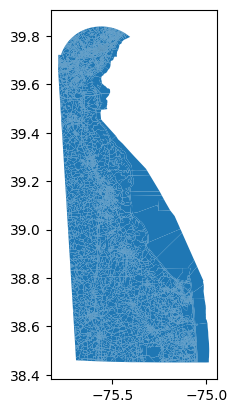

In [26]:
#-- test shapefiles
ct.plot()

In [27]:
ct.head(5)

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,10,003,016611,1001,100030166111001,Block 1001,G5040,NaN,NaN,NaN,S,227781,0,+39.5484613,-075.6515952,"POLYGON ((-75.65542 39.54930, -75.65459 39.549..."
1,10,003,011800,2010,100030118002010,Block 2010,G5040,NaN,NaN,NaN,S,105539,0,+39.7708938,-075.5979215,"POLYGON ((-75.59892 39.77281, -75.59887 39.773..."
2,10,003,016610,1026,100030166101026,Block 1026,G5040,NaN,NaN,NaN,S,1571084,0,+39.4286213,-075.7468751,"POLYGON ((-75.75740 39.43498, -75.75734 39.435..."
3,10,003,014404,1023,100030144041023,Block 1023,G5040,NaN,NaN,NaN,S,14227,0,+39.6799763,-075.7838066,"POLYGON ((-75.78475 39.68048, -75.78470 39.680..."
4,10,003,010200,2001,100030102002001,Block 2001,G5040,NaN,NaN,NaN,S,20711,0,+39.8121236,-075.4696898,"POLYGON ((-75.47102 39.81160, -75.47086 39.811..."


In [28]:
ct.GEOID20.dtype

dtype('O')

In [29]:
ct.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [30]:
ct["GEOID20"] = ct["GEOID20"].astype(int)

In [31]:
ct.shape

(20198, 16)

In [32]:
#-- import fcc datasets
cable = pd.read_csv("/content/drive/MyDrive/BroadbandOrg/bdc_10_Cable_fixed_broadband_123122.csv")
copper = pd.read_csv("/content/drive/MyDrive/BroadbandOrg/bdc_10_Copper_fixed_broadband_123122.csv")
fiber = pd.read_csv("/content/drive/MyDrive/BroadbandOrg/bdc_10_Fiber-to-the-Premises_fixed_broadband_123122.csv")

In [33]:
#-- test datasets
print(cable.shape)
print(copper.shape)
print(fiber.shape)

(371926, 12)
(112127, 12)
(195057, 12)


In [34]:
371926+112127+195057

679110

In [35]:
#-- merge/concatenate datasets
connection = pd.concat([cable, copper, fiber])

In [36]:
#-- test dataset
len(connection.block_geoid.unique())

15454

In [37]:
connection.shape

(679110, 12)

In [38]:
len(connection.location_id.unique())

371725

In [39]:
connection.head(5)

,frn,provider_id,brand_name,location_id,technology,max_advertised_download_speed,max_advertised_upload_speed,low_latency,business_residential_code,state_usps,block_geoid,h3_res8_id
0,3768165,130317,Xfinity,1062716001,40,1200,35,1,X,DE,100030131002000,882aaca98bfffff
1,3768165,130317,Xfinity,1062720485,40,1200,35,1,X,DE,100030163091001,882aac32c1fffff
2,3768165,130317,Xfinity,1062730641,40,2000,200,1,X,DE,100030028001057,882aacaaa3fffff
3,3768165,130317,Xfinity,1062732363,40,1200,35,1,X,DE,100030136123003,882aac06ddfffff
4,3768165,130317,Xfinity,1062733787,40,1200,35,1,X,DE,100030114003008,882aacaa0bfffff


In [40]:
connection.brand_name.unique()

array(['Xfinity', 'Mediacom Delaware LLC', 'Breezeline',
       'Mediacom Minnesota LLC', 'Mediacom Southeast LLC', 'Verizon',
       'TPx Communications', 'Crown Castle Fiber LLC', 'Telesystem',
       'NetCarrier Telecom, Inc.', 'Bay Country Communications',
       'ZAYO GROUP, LLC', 'Xtel Communications', 'NetFortris', 'Netrix'],
      dtype=object)

In [41]:
connection.block_geoid.dtype

dtype('int64')

In [42]:
#-- merge new dataset with geopandas using block_geoid as connector
connection_shp = connection.merge(ct, left_on="block_geoid", right_on="GEOID20")

In [43]:
connection_shp = gpd.GeoDataFrame(connection_shp, crs="EPSG:4269")

In [ ]:
connection_shp.shape

In [45]:
#-- memory management
import gc

del connection
del cable
del copper
del fiber

gc.collect()


15

<Axes: >

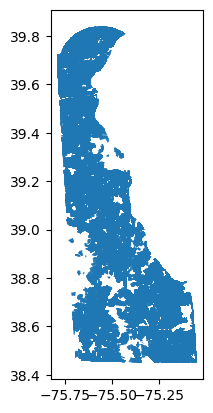

In [46]:
connection_shp.plot()

<Axes: >

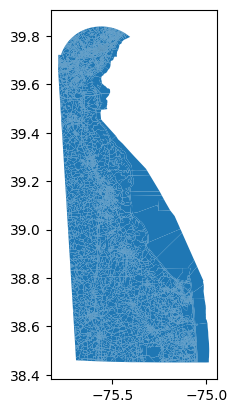

In [47]:
ct.plot()

In [49]:
broadband = pd.read_csv("/content/drive/MyDrive/BroadbandOrg/bdc_us_broadband_summary_by_geography_123122.csv")

<ipython-input-49-35ac7b0f5415>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  broadband = pd.read_csv("/content/drive/MyDrive/BroadbandOrg/bdc_us_broadband_summary_by_geography_123122.csv")


In [50]:
broadband.shape

(37624, 224)

In [51]:
broadband.head(5)

,geography_type,geography_id,geography_desc,geography_desc_full,total_units,t1_s1_r,t1_s2_r,t1_s3_r,t1_s4_r,t1_s5_r,...,t1_2_3_7_s7_b,total_area,mobilebb_3g_area_st_pct,mobilebb_3g_area_iv_pct,mobilebb_4g_area_st_pct,mobilebb_4g_area_iv_pct,mobilebb_5g_spd1_area_st_pct,mobilebb_5g_spd1_area_iv_pct,mobilebb_5g_spd2_area_st_pct,mobilebb_5g_spd2_area_iv_pct
0,CBSA (MSA),10100,"Aberdeen, SD","Aberdeen, SD",25382.0,0.7148,0.5609,0.5015,0.0000,0.0000,...,0.9439,7377.3830,0.0000,0.0000,0.9993,0.9171,0.4719,0.1829,0.1460,0.0273
1,CBSA (MSA),10140,"Aberdeen, WA","Aberdeen, WA",41554.0,0.4681,0.2620,0.0419,0.0000,0.0000,...,0.8841,6530.4043,0.0000,0.0000,0.6018,0.3413,0.3749,0.1295,0.2130,0.0508
2,CBSA (MSA),10180,"Abilene, TX","Abilene, TX",90149.0,0.4517,0.2121,0.0343,0.0210,0.0001,...,0.7743,6257.6985,0.0015,0.0004,0.9799,0.8525,0.8619,0.7523,0.3860,0.3021
3,CBSA (MSA),10220,"Ada, OK","Ada, OK",21225.0,0.4261,0.2487,0.0415,0.0000,0.0000,...,0.7393,1712.1798,0.8060,0.4423,0.9556,0.7149,0.8121,0.6353,0.3645,0.2476
4,CBSA (MSA),10300,"Adrian, MI","Adrian, MI",51052.0,0.2551,0.2524,0.0288,0.0012,0.0000,...,0.9720,1931.1661,0.0000,0.0000,0.9999,0.9322,0.9545,0.7233,0.5328,0.2511


In [53]:
broadband[broadband["geography_desc_full"].str.contains("DE")]

,geography_type,geography_id,geography_desc,geography_desc_full,total_units,t1_s1_r,t1_s2_r,t1_s3_r,t1_s4_r,t1_s5_r,...,t1_2_3_7_s7_b,total_area,mobilebb_3g_area_st_pct,mobilebb_3g_area_iv_pct,mobilebb_4g_area_st_pct,mobilebb_4g_area_iv_pct,mobilebb_5g_spd1_area_st_pct,mobilebb_5g_spd1_area_iv_pct,mobilebb_5g_spd2_area_st_pct,mobilebb_5g_spd2_area_iv_pct
237,CBSA (MSA),20100,"Dover, DE","Dover, DE",85264.0,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.9594,2119.6059,0.0,0.0,0.7481,0.6649,0.7176,0.6056,0.6182,0.4400
665,CBSA (MSA),37980,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD","Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",2827367.0,0.2692,0.0699,0.0015,0.0009,0.0001,...,0.9916,12726.5886,0.0,0.0,0.9693,0.8748,0.9068,0.7962,0.7748,0.4844
749,CBSA (MSA),41540,"Salisbury, MD-DE","Salisbury, MD-DE",296144.0,0.2926,0.0666,0.0000,0.0000,0.0000,...,0.9303,7819.3581,0.0,0.0,0.7349,0.6248,0.6601,0.5382,0.4562,0.3041
5285,Census Place,1001400,Arden,"Arden, DE",246.0,0.0000,0.0000,0.0000,0.0000,0.0000,...,1.0000,0.6320,0.0,0.0,1.0000,1.0000,1.0000,1.0000,0.8333,0.3333
5286,Census Place,1001530,Ardencroft,"Ardencroft, DE",101.0,0.0000,0.0000,0.0000,0.0000,0.0000,...,1.0000,0.2107,0.0,0.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5361,Census Place,1080895,Woodside East,"Woodside East, DE",1111.0,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.9991,4.8453,0.0,0.0,1.0000,0.9783,1.0000,1.0000,0.9565,0.8261
5362,Census Place,1081350,Wyoming,"Wyoming, DE",739.0,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.9959,2.6333,0.0,0.0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
33820,County,10001,Kent County,"Kent County, DE",85264.0,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.9594,2119.6059,0.0,0.0,0.7481,0.6649,0.7176,0.6056,0.6182,0.4400
33821,County,10003,New Castle County,"New Castle County, DE",253640.0,0.5963,0.1000,0.0000,0.0000,0.0000,...,0.9928,1300.2244,0.0,0.0,0.9390,0.8863,0.9086,0.8225,0.8214,0.5183
